In [1]:
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] #petal length, width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(
    tree_clf,
                  #petal length, width
    feature_names=["꽃잎 길이(cm)","꽃잎 너비(cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

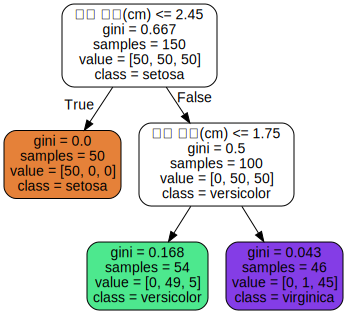

In [3]:
graph = graphviz.Source(dot_data)
graph #설명 가능한 인공지능 Explainable AI

In [16]:
#파일 읽기
import pandas as pd
url= 'titanic.csv'
titanic = pd.read_csv(url)

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
titanic.shape

(891, 12)

In [19]:
titanic.Sex = titanic.Sex.map({'female':0, 'male':1})
titanic.Age.fillna(titanic.Age.median(), inplace=True)

In [20]:
#Embarked 누락값을 S로
titanic.Embarked.fillna('S', inplace=True)

#get_dummy 만들기
#S 0 1
#C 0 0 
#Q 1 0 로 변환
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked', drop_first=True)
embarked_dummies

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [26]:
titanic = pd.concat([titanic, embarked_dummies], axis=1)

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


In [27]:
#각 승객의 고유번호, 성별, 나이, 승선한 항 Q, S
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
#생존 예측
y = titanic.Survived

In [29]:
X.isnull()

,Pclass,Sex,Age,Embarked_Q,Embarked_S
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
886,False,False,False,False,False
887,False,False,False,False,False
888,False,False,False,False,False
889,False,False,False,False,False


In [30]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X,y)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [31]:
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Pclass,0.242664
1,Sex,0.655584
2,Age,0.064494
3,Embarked_Q,0.000000
4,Embarked_S,0.037258
